In [1]:
from malaya_speech import Pipeline
import malaya_speech
import numpy as np

In [15]:
malaya_speech.speaker_vector.available_model()

{'vggvox-v1': ['70.8 MB', 'Embedding Size: 1024', 'EER: 0.1407'],
 'vggvox-v2': ['31.1 MB', 'Embedding Size: 512', 'EER: 0.0445'],
 'vggbox-v2-circleloss': ['31.1 MB', 'Embedding Size: 512'],
 'inception-v4-circleloss': []}

Smaller EER the better model is.

In [2]:
model = malaya_speech.speaker_vector.load()

In [3]:
from glob import glob

speakers = glob('speech/example-speaker/*.wav')
speakers

['speech/example-speaker/khalil-nooh.wav',
 'speech/example-speaker/mas-aisyah.wav',
 'speech/example-speaker/shafiqah-idayu.wav',
 'speech/example-speaker/husein-zolkepli.wav']

In [9]:
def load_wav(file):
    return malaya_speech.utils.read.wav(file)[0]

p = Pipeline()
frame = (
    p.foreach_map(load_wav)
    .foreach_map(malaya_speech.utils.astype.int_to_float)
    .map(model.predict)
)

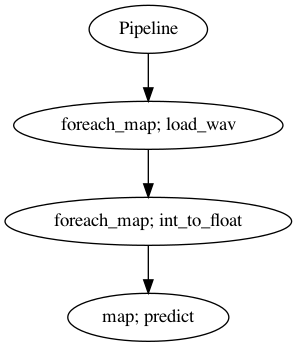

In [10]:
p.visualize()

In [11]:
r = p.emit(speakers)

In [14]:
from scipy.spatial.distance import cdist

cdist(r['predict'], r['predict'], metric='cosine')

array([[1.11022302e-16, 3.36490431e-01, 3.63971467e-01, 2.05766059e-01],
       [3.36490431e-01, 0.00000000e+00, 3.56349797e-01, 3.60301181e-01],
       [3.63971467e-01, 3.56349797e-01, 0.00000000e+00, 3.79253021e-01],
       [2.05766059e-01, 3.60301181e-01, 3.79253021e-01, 0.00000000e+00]])

Remember, our files are,

```python
['speech/example-speaker/khalil-nooh.wav',
 'speech/example-speaker/mas-aisyah.wav',
 'speech/example-speaker/shafiqah-idayu.wav',
 'speech/example-speaker/husein-zolkepli.wav']
```

If we check first row,

```python
[1.11022302e-16, 3.36490431e-01, 3.63971467e-01, 2.05766059e-01]
```

second smallest is `2.05766059e-01`, which is 4th column, which is `husein-zolkepli.wav`. So the speaker vector knows `khalil-nooh.wav` sounds similar to `husein-zolkepli.wav`.